Name:Nandan D \
Srn:PES2UG23CS363

### Correlation Analysis
UE23CS342AA2 - Data Analytics (S Sri Shaatvika - srishaatvika@gmail.com) <br>
There are 5 sections in this worksheet covering different topics


In [1]:
library(dplyr)
library(ggplot2)
library(readr)
library(lubridate)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




# About the Dataset
**This analysis uses two datasets to explore the relationship between CO₂ levels and global temperatures:<br>
carbon-dioxide: Contains monthly atmospheric CO₂ concentrations (ppm) recorded at Mauna Loa Observatory from 1958 onward.<br> 
climate-change-earth-surface-temperature: Provides monthly global temperature averages (land, ocean, combined) from 1850 onward, compiled by Berkeley Earth. For this worksheet we will be using the GlobalTemperatures.csv dataset.**

**We focus on yearly averages and investigate how rising CO₂ levels relate to changes in global surface temperatures over time.** 



# Section 1: Data Loading and Exploration

In [2]:
#loading dataset 
temp_df <- read.csv("/kaggle/input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv")
head(temp_df)

co2_df <- read.csv("/kaggle/input/carbon-dioxide/archive.csv")
head(co2)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1750-01-01,3.034,3.574,NA,NA,NA,NA,NA,NA
2,1750-02-01,3.083,3.702,NA,NA,NA,NA,NA,NA
3,1750-03-01,5.626,3.076,NA,NA,NA,NA,NA,NA
4,1750-04-01,8.490,2.451,NA,NA,NA,NA,NA,NA
5,1750-05-01,11.573,2.072,NA,NA,NA,NA,NA,NA
6,1750-06-01,12.937,1.724,NA,NA,NA,NA,NA,NA


[1] 315.42 316.31 316.50 317.56 318.13 318.00

**Q1.1 (Optional but recommended) Analyse the columns and data structures. Rename them while performing analysis.**

In [3]:
str(temp_df)
str(co2_df)  # str = structure

' Columns Name :'
colnames(temp_df)
colnames(co2_df) 

'data.frame':	3192 obs. of  9 variables:
 $ dt                                       : chr  "1750-01-01" "1750-02-01" "1750-03-01" "1750-04-01" ...
 $ LandAverageTemperature                   : num  3.03 3.08 5.63 8.49 11.57 ...
 $ LandAverageTemperatureUncertainty        : num  3.57 3.7 3.08 2.45 2.07 ...
 $ LandMaxTemperature                       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ LandMaxTemperatureUncertainty            : num  NA NA NA NA NA NA NA NA NA NA ...
 $ LandMinTemperature                       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ LandMinTemperatureUncertainty            : num  NA NA NA NA NA NA NA NA NA NA ...
 $ LandAndOceanAverageTemperature           : num  NA NA NA NA NA NA NA NA NA NA ...
 $ LandAndOceanAverageTemperatureUncertainty: num  NA NA NA NA NA NA NA NA NA NA ...
'data.frame':	720 obs. of  7 variables:
 $ Year                             : int  1958 1958 1958 1958 1958 1958 1958 1958 1958 1958 ...
 $ Month                            : int  1 

[1] " Columns Name :"

[1] "dt"                                       
[2] "LandAverageTemperature"                   
[3] "LandAverageTemperatureUncertainty"        
[4] "LandMaxTemperature"                       
[5] "LandMaxTemperatureUncertainty"            
[6] "LandMinTemperature"                       
[7] "LandMinTemperatureUncertainty"            
[8] "LandAndOceanAverageTemperature"           
[9] "LandAndOceanAverageTemperatureUncertainty"

[1] "Year"                              "Month"                            
[3] "Decimal.Date"                      "Carbon.Dioxide..ppm."             
[5] "Seasonally.Adjusted.CO2..ppm."     "Carbon.Dioxide.Fit..ppm."         
[7] "Seasonally.Adjusted.CO2.Fit..ppm."

In [4]:
# summary 
summary(temp_df)
summary(co2_df)

      dt            LandAverageTemperature LandAverageTemperatureUncertainty
 Length:3192        Min.   :-2.080         Min.   :0.0340                   
 Class :character   1st Qu.: 4.312         1st Qu.:0.1867                   
 Mode  :character   Median : 8.611         Median :0.3920                   
                    Mean   : 8.375         Mean   :0.9385                   
                    3rd Qu.:12.548         3rd Qu.:1.4192                   
                    Max.   :19.021         Max.   :7.8800                   
                    NA's   :12             NA's   :12                       
 LandMaxTemperature LandMaxTemperatureUncertainty LandMinTemperature
 Min.   : 5.90      Min.   :0.0440                Min.   :-5.407    
 1st Qu.:10.21      1st Qu.:0.1420                1st Qu.:-1.335    
 Median :14.76      Median :0.2520                Median : 2.950    
 Mean   :14.35      Mean   :0.4798                Mean   : 2.744    
 3rd Qu.:18.45      3rd Qu.:0.5390     

      Year          Month        Decimal.Date  Carbon.Dioxide..ppm.
 Min.   :1958   Min.   : 1.00   Min.   :1958   Min.   :313.2       
 1st Qu.:1973   1st Qu.: 3.75   1st Qu.:1973   1st Qu.:328.6       
 Median :1988   Median : 6.50   Median :1988   Median :349.8       
 Mean   :1988   Mean   : 6.50   Mean   :1988   Mean   :352.4       
 3rd Qu.:2002   3rd Qu.: 9.25   3rd Qu.:2003   3rd Qu.:373.2       
 Max.   :2017   Max.   :12.00   Max.   :2018   Max.   :407.6       
                                               NA's   :17          
 Seasonally.Adjusted.CO2..ppm. Carbon.Dioxide.Fit..ppm.
 Min.   :314.4                 Min.   :312.4           
 1st Qu.:329.0                 1st Qu.:328.3           
 Median :349.8                 Median :349.4           
 Mean   :352.4                 Mean   :352.1           
 3rd Qu.:372.9                 3rd Qu.:372.8           
 Max.   :406.0                 Max.   :407.3           
 NA's   :17                    NA's   :13              
 Seasona

In [5]:
colnames(co2_df) %>% dput()
colnames(temp_df) %>% dput()


c("Year", "Month", "Decimal.Date", "Carbon.Dioxide..ppm.", "Seasonally.Adjusted.CO2..ppm.", 
"Carbon.Dioxide.Fit..ppm.", "Seasonally.Adjusted.CO2.Fit..ppm."
)
c("dt", "LandAverageTemperature", "LandAverageTemperatureUncertainty", 
"LandMaxTemperature", "LandMaxTemperatureUncertainty", "LandMinTemperature", 
"LandMinTemperatureUncertainty", "LandAndOceanAverageTemperature", 
"LandAndOceanAverageTemperatureUncertainty")


In [6]:
"Before Renameing"
"changed column names in co2 "
colnames(co2_df)
'changed column names in temperature '
colnames(temp_df)

# Fix column names (avoid NA/"")
colnames(temp_df) <- make.names(colnames(temp_df), unique = TRUE)
colnames(co2_df)  <- make.names(colnames(co2_df), unique = TRUE)

colnames(co2_df) <- c("year", "month", "decimal_date",
                      "co2_ppm", "co2_season_adj",
                      "co2_fit", "co2_season_adj_fit")

colnames(temp_df) <- c("date", "land_temp", "land_temp_unc",
                       "land_max_temp", "land_max_temp_unc",
                       "land_min_temp", "land_min_temp_unc",
                       "land_ocean_temp", "land_ocean_temp_unc")


# Remove columns with NA or "" in their names
co2_df <- co2_df[, !is.na(colnames(co2_df)) & colnames(co2_df) != ""]
temp_df <- temp_df[, !is.na(colnames(temp_df)) & colnames(temp_df) != ""]

"After Renameing"
"changed column names in co2 "
colnames(co2_df)
'changed column names in temperature '
colnames(temp_df)

[1] "Before Renameing"

[1] "changed column names in co2 "

[1] "Year"                              "Month"                            
[3] "Decimal.Date"                      "Carbon.Dioxide..ppm."             
[5] "Seasonally.Adjusted.CO2..ppm."     "Carbon.Dioxide.Fit..ppm."         
[7] "Seasonally.Adjusted.CO2.Fit..ppm."

[1] "changed column names in temperature "

[1] "dt"                                       
[2] "LandAverageTemperature"                   
[3] "LandAverageTemperatureUncertainty"        
[4] "LandMaxTemperature"                       
[5] "LandMaxTemperatureUncertainty"            
[6] "LandMinTemperature"                       
[7] "LandMinTemperatureUncertainty"            
[8] "LandAndOceanAverageTemperature"           
[9] "LandAndOceanAverageTemperatureUncertainty"

[1] "After Renameing"

[1] "changed column names in co2 "

[1] "year"               "month"              "decimal_date"      
[4] "co2_ppm"            "co2_season_adj"     "co2_fit"           
[7] "co2_season_adj_fit"

[1] "changed column names in temperature "

[1] "date"                "land_temp"           "land_temp_unc"      
[4] "land_max_temp"       "land_max_temp_unc"   "land_min_temp"      
[7] "land_min_temp_unc"   "land_ocean_temp"     "land_ocean_temp_unc"

# Section 2: Data Cleaning and Pre-processing <br>
Prepare the datasets for analysis by handling missing values, standardizing formats, and ensuring data consistency.



**Q 2.1 Identify and handle any missing values in both datasets. Justify your approach**

In [7]:
#Your code here 
colSums(is.na(co2_df))
colSums(is.na(temp_df))

year              month       decimal_date            co2_ppm 
                 0                  0                  0                 17 
    co2_season_adj            co2_fit co2_season_adj_fit 
                17                 13                 13

date           land_temp       land_temp_unc       land_max_temp 
                  0                  12                  12                1200 
  land_max_temp_unc       land_min_temp   land_min_temp_unc     land_ocean_temp 
               1200                1200                1200                1200 
land_ocean_temp_unc 
               1200

In [8]:
#Your code
# temp_df <- temp_df %>% filter(!is.na(LandOceanTemp))
colSums(is.na(co2_df))
colSums(is.na(temp_df))

year              month       decimal_date            co2_ppm 
                 0                  0                  0                 17 
    co2_season_adj            co2_fit co2_season_adj_fit 
                17                 13                 13

date           land_temp       land_temp_unc       land_max_temp 
                  0                  12                  12                1200 
  land_max_temp_unc       land_min_temp   land_min_temp_unc     land_ocean_temp 
               1200                1200                1200                1200 
land_ocean_temp_unc 
               1200

In [9]:
# temp_df <- temp_df %>% filter(!is.na(LandOceanTemp))
temp_df <- temp_df %>% na.omit()
co2_df  <- co2_df %>% na.omit()


**Q 2.2 The Date columns are not properly formatted for merging datasets or to perform any analysis. Clean the date column in both datasets and merge based on "Year"** <br>
*Hint: You will have to average annual temperatures in the temperatures dataframe and the monthly CO2 values in the CO2 values dataframe.*
*Ensure that you do this for all the temperature metrics*

In [10]:

# Clean up date formats
temp_df <- temp_df %>%
  mutate(
    date = as.Date(date),                # convert string → Date
    year = year(date),                   # extract year
    month = month(date)                  # extract month
  )

co2_df <- co2_df %>%
  mutate(
    year = as.integer(year),             # make sure year is numeric
    month = as.integer(month)            # make sure month is numeric
  )

# group by year & take mean for ALL metrics
temp_yearly <- temp_df %>%
  group_by(year) %>%
  summarise(
    land_temp = mean(land_temp, na.rm = TRUE),
    land_temp_unc = mean(land_temp_unc, na.rm = TRUE),
    land_max_temp = mean(land_max_temp, na.rm = TRUE),
    land_max_temp_unc = mean(land_max_temp_unc, na.rm = TRUE),
    land_min_temp = mean(land_min_temp, na.rm = TRUE),
    land_min_temp_unc = mean(land_min_temp_unc, na.rm = TRUE),
    land_ocean_temp = mean(land_ocean_temp, na.rm = TRUE),
    land_ocean_temp_unc = mean(land_ocean_temp_unc, na.rm = TRUE)
  )

#group by year & take mean of monthly values
co2_yearly <- co2_df %>%
  group_by(year) %>%
  summarise(
    co2_ppm = mean(co2_ppm, na.rm = TRUE),
    co2_season_adj = mean(co2_season_adj, na.rm = TRUE),
    co2_fit = mean(co2_fit, na.rm = TRUE),
    co2_season_adj_fit = mean(co2_season_adj_fit, na.rm = TRUE)
  )

# Merge datasets on "year"
merged_df <- inner_join(temp_yearly, co2_yearly, by = "year")


head(merged_df)


year,land_temp,land_temp_unc,land_max_temp,land_max_temp_unc,land_min_temp,land_min_temp_unc,land_ocean_temp,land_ocean_temp_unc,co2_ppm,co2_season_adj,co2_fit,co2_season_adj_fit
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1958,8.773750,0.10433333,14.47750,0.1610000,3.114500,0.1725833,15.38208,0.07450000,315.3300,315.2925,315.2538,315.2188
1959,8.732667,0.10716667,14.41650,0.1500833,3.108583,0.1491667,15.34050,0.07391667,315.9817,315.9767,315.9983,315.9942
1960,8.583750,0.09350000,14.31742,0.1494167,2.932583,0.1375833,15.29192,0.06933333,316.9083,316.9067,316.9058,316.9050
1961,8.797667,0.09700000,14.51492,0.1657500,3.128750,0.1817500,15.37992,0.06716667,317.6450,317.6400,317.6292,317.6250
1962,8.745917,0.13291667,14.54017,0.1589167,3.008583,0.2044167,15.32558,0.07250000,318.4533,318.4483,318.4550,318.4500
1963,8.856000,0.09233333,14.61225,0.1527500,3.157583,0.1824167,15.37667,0.06833333,318.9925,318.9867,319.0250,319.0183


In [11]:
colSums(is.na(merged_df))
summary(merged_df)

year           land_temp       land_temp_unc       land_max_temp 
                  0                   0                   0                   0 
  land_max_temp_unc       land_min_temp   land_min_temp_unc     land_ocean_temp 
                  0                   0                   0                   0 
land_ocean_temp_unc             co2_ppm      co2_season_adj             co2_fit 
                  0                   0                   0                   0 
 co2_season_adj_fit 
                  0

      year        land_temp     land_temp_unc     land_max_temp  
 Min.   :1958   Min.   :8.347   Min.   :0.06208   Min.   :14.01  
 1st Qu.:1972   1st Qu.:8.700   1st Qu.:0.08342   1st Qu.:14.39  
 Median :1986   Median :8.964   Median :0.08771   Median :14.65  
 Mean   :1986   Mean   :9.030   Mean   :0.08975   Mean   :14.73  
 3rd Qu.:2001   3rd Qu.:9.398   3rd Qu.:0.09658   3rd Qu.:15.13  
 Max.   :2015   Max.   :9.831   Max.   :0.13292   Max.   :15.57  
 land_max_temp_unc land_min_temp   land_min_temp_unc land_ocean_temp
 Min.   :0.0785    Min.   :2.734   Min.   :0.1025    Min.   :15.12  
 1st Qu.:0.1117    1st Qu.:3.116   1st Qu.:0.1198    1st Qu.:15.34  
 Median :0.1255    Median :3.376   Median :0.1353    Median :15.48  
 Mean   :0.1283    Mean   :3.408   Mean   :0.1394    Mean   :15.52  
 3rd Qu.:0.1495    3rd Qu.:3.720   3rd Qu.:0.1511    3rd Qu.:15.75  
 Max.   :0.1845    Max.   :4.149   Max.   :0.2071    Max.   :16.06  
 land_ocean_temp_unc    co2_ppm      co2_season_adj    

# Section 3: Correlation Analysis
Correlation analysis is a statistical method used to measure the strength and direction of a relationship between two variables.<br>
The result is a correlation coefficient ranging from -1 to +1:<br>
* +1: Perfect positive correlation (both increase together)
* 0: No correlation
* –1: Perfect negative correlation (one increases, the other decreases)

We will be dealing with Pearson coefficient in this section

**Q3.1 Calculate the Pearson correlation coefficient between the CO2 concentration and the different temperature metrics**

In [12]:

cor(merged_df$co2_ppm, merged_df$land_temp, use = "complete.obs", method = "pearson")

[1] 0.9029036

In [13]:
# Select only numeric columns you want to compare
cor_matrix <- cor(
  merged_df %>% select(co2_ppm, land_temp, land_max_temp, land_min_temp, land_ocean_temp),
  use = "complete.obs",
  method = "pearson"
)

print(cor_matrix)


                  co2_ppm land_temp land_max_temp land_min_temp land_ocean_temp
co2_ppm         1.0000000 0.9029036     0.8943414     0.8961389       0.9172674
land_temp       0.9029036 1.0000000     0.9939320     0.9840653       0.9793789
land_max_temp   0.8943414 0.9939320     1.0000000     0.9649772       0.9700077
land_min_temp   0.8961389 0.9840653     0.9649772     1.0000000       0.9655311
land_ocean_temp 0.9172674 0.9793789     0.9700077     0.9655311       1.0000000


**Q3.2 Visualise the values using line graphs and scatter plots for each temperature metric**

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
`geom_smooth()` using formula = 'y ~ x'


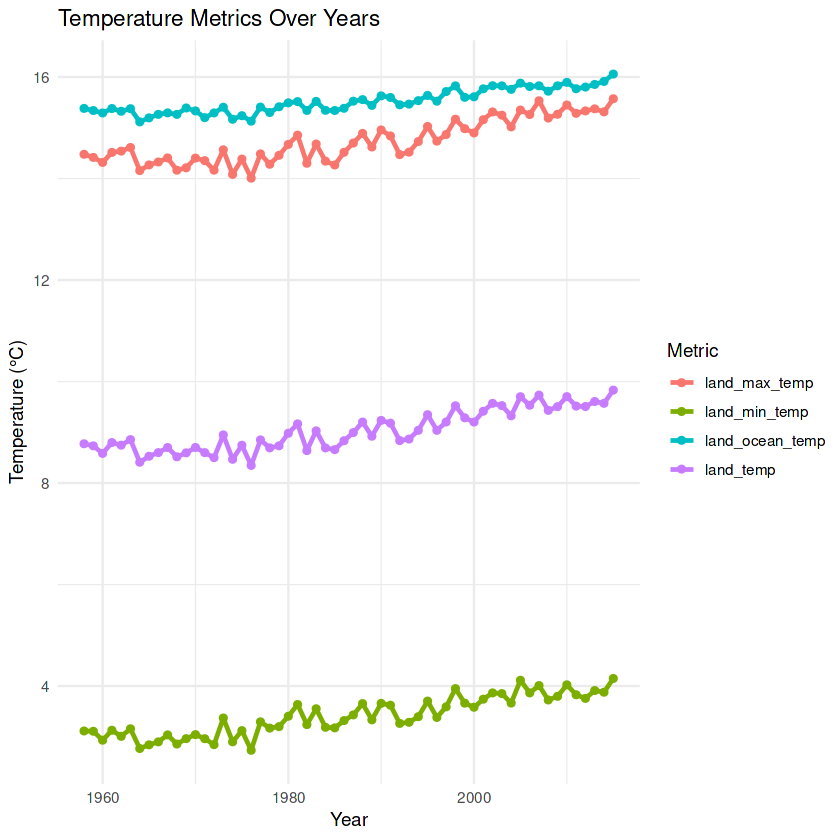

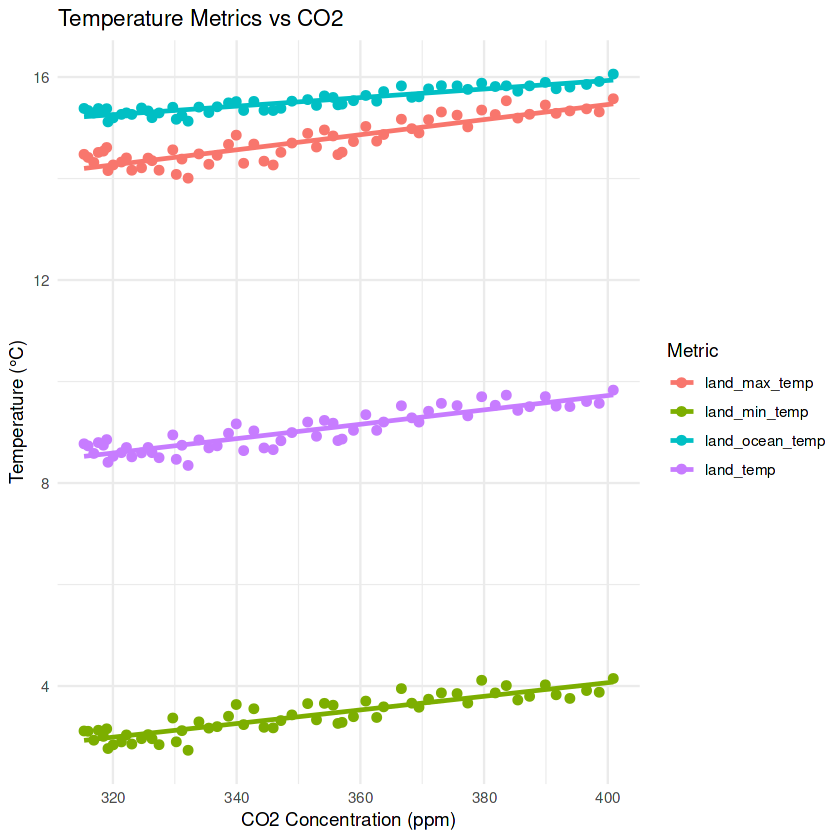

In [14]:
#Your code
library(ggplot2)
library(tidyr)
library(dplyr)

# First, reshape data for easier plotting
temp_metrics <- merged_df %>%
  select(year, land_temp, land_max_temp, land_min_temp, land_ocean_temp) %>%
  pivot_longer(-year, names_to = "metric", values_to = "temperature")

# Line plots of temperature metrics over years
ggplot(temp_metrics, aes(x = year, y = temperature, color = metric)) +
  geom_line(size = 1) +
  geom_point() +
  labs(title = "Temperature Metrics Over Years",
       x = "Year",
       y = "Temperature (°C)",
       color = "Metric") +
  theme_minimal()

# Scatter plots of each temperature metric vs CO2
scatter_plot <- merged_df %>%
  select(year, co2_ppm, land_temp, land_max_temp, land_min_temp, land_ocean_temp) %>%
  pivot_longer(cols = -c(year, co2_ppm), names_to = "metric", values_to = "temperature")

ggplot(scatter_plot, aes(x = co2_ppm, y = temperature, color = metric)) +
  geom_point(size = 2) +
  geom_smooth(method = "lm", se = FALSE) +   # adds regression line
  labs(title = "Temperature Metrics vs CO2",
       x = "CO2 Concentration (ppm)",
       y = "Temperature (°C)",
       color = "Metric") +
  theme_minimal()


**Q3.3: Compare the strength of these correlations. Which temperature metric is most strongly associated with CO2? Why might that be?<br>
Q3.4: Briefly explain the conceptual difference between Pearson correlation and Spearman's Rank Correlation. In what scenario might Spearman's correlation be more appropriate for analyzing the relationship between CO2 and temperature, even if they appear broadly linearly related?** <br>
*Bonus: explore correlation calculation of monotonic values. (Kendall's tau relation)*


In [15]:
#Your answer
# Compute Pearson correlations
cor_results <- merged_df %>%
  summarise(
    corr_land_temp = cor(co2_ppm, land_temp, use = "complete.obs", method = "pearson"),
    corr_land_max_temp = cor(co2_ppm, land_max_temp, use = "complete.obs", method = "pearson"),
    corr_land_min_temp = cor(co2_ppm, land_min_temp, use = "complete.obs", method = "pearson"),
    corr_land_ocean_temp = cor(co2_ppm, land_ocean_temp, use = "complete.obs", method = "pearson")
  )

cor_results


corr_land_temp,corr_land_max_temp,corr_land_min_temp,corr_land_ocean_temp
<dbl>,<dbl>,<dbl>,<dbl>
0.9029036,0.8943414,0.8961389,0.9172674


Pearson vs Spearman Correlation

Pearson Correlation

Measures the strength and direction of a linear relationship between two continuous variables.
Sensitive to outliers and assumes the relationship is linear.
Value ranges from -1 (perfect negative linear) to +1 (perfect positive linear).

Spearman's Rank Correlation

Measures the strength and direction of a monotonic relationship (variables move in the same direction but not necessarily linearly).
Based on ranked values, so less sensitive to outliers and non-normal distributions.
Useful when the relationship is non-linear but monotonic.

Scenario for using Spearman with CO2 and temperature:
Even if CO2 and temperature appear broadly linear, small deviations, outliers, or non-linear trends (like accelerated warming at higher CO2 levels) may make Spearman more reliable for capturing the overall monotonic trend.

In [16]:
# Compute Kendall's tau correlations
kendall_results <- merged_df %>%
  summarise(
    tau_land_temp = cor(co2_ppm, land_temp, use = 
                        "complete.obs", method = "kendall"),
    tau_land_max_temp = cor(co2_ppm, land_max_temp, use = "complete.obs", method = "kendall"),
    tau_land_min_temp = cor(co2_ppm, land_min_temp, use = "complete.obs", method = "kendall"),
    tau_land_ocean_temp = cor(co2_ppm, land_ocean_temp, use = "complete.obs", method = "kendall")
  )

kendall_results

tau_land_temp,tau_land_max_temp,tau_land_min_temp,tau_land_ocean_temp
<dbl>,<dbl>,<dbl>,<dbl>
0.6721113,0.6636419,0.707199,0.7180883


# Section 4: Hidden Variable and Causation

**Q4.1: While our analysis shows a strong correlation between Yearly_CO2_Concentration and GlobalAverageTemperature, can we definitively say that increasing CO2 causes the temperature to rise based solely on this correlation? Explain your reasoning and discuss why correlation does not imply causation.** <br><br>

*Even though our correlation analysis shows a strong relationship between yearly CO₂ concentration and global average temperature, we cannot claim causation based solely on correlation.Correlation ≠ Causation: Correlation only shows that two variables move together, but not why.There could be hidden variables (confounders) influencing both CO₂ and temperature.For example, industrialization simultaneously increases CO₂ emissions and other pollutants that can alter temperature.Thus, while correlation supports the hypothesis, causation is established through physics + multiple lines of evidence, not correlation alone.*

<br><br><br>
**Q4.2: Beyond CO2, what other factors or "hidden variables" might influence global average temperatures? Briefly discuss how these factors could potentially make the relationship between CO2 and temperature seem more or less strong if not considered.**<br><br>

*Beyond CO₂, there are multiple hidden variables that can influence global average temperature:
Solar Irradiance
Changes in the Sun’s energy output can warm or cool Earth.
If ignored, temperature changes might be wrongly attributed solely to CO₂.
Volcanic Activity
Large eruptions inject aerosols into the atmosphere, reflecting sunlight and causing temporary cooling.
Could weaken the apparent CO₂–temperature relationship during certain decades.
Aerosols & Air Pollution
Human-emitted aerosols (sulfates, particulates) can have a cooling effect by reflecting sunlight.
Without accounting for them, CO₂’s warming effect might seem less strong.
Ocean Cycles (ENSO, AMO, PDO)
Cyclical changes in ocean currents redistribute heat, causing short-term fluctuations in global temperature.
Can make the CO₂–temperature relationship appear noisy in the short term.
Land Use Change
Deforestation, urbanization, and agriculture alter Earth’s surface albedo (reflectivity), affecting warming.*

Impact on correlation:

*Ignoring these variables could either inflate (e.g., coinciding warming from solar activity) or dampen (e.g., volcanic cooling) the apparent CO₂–temperature relationship.*


# Section 5: Missing Data Mechanisms

**Q5.1 From the dataset snippet identify missing data as Missing Completely At Random (MCAR), Missing At Random (MAR) and Missing Not At Random (MNAR). Justify** <br>
*Hint: read up about ozone sensors to answer this question*

In [25]:
# Load dataset
data <- read.csv("/kaggle/input/missing-data/missing_data.csv")

str(data)
summary(data)
colSums(is.na(data))

'data.frame':	5 obs. of  4 variables:
 $ Station_ID       : chr  "ST001" "ST002" "ST003" "ST004" ...
 $ Location_Type    : chr  "Urban" "Urban" "Rural" "Urban" ...
 $ Humidity....     : int  45 90 35 85 50
 $ Ozone_Level..ppb.: chr  "30" "missing" "25" "missing" ...


  Station_ID        Location_Type       Humidity.... Ozone_Level..ppb. 
 Length:5           Length:5           Min.   :35    Length:5          
 Class :character   Class :character   1st Qu.:45    Class :character  
 Mode  :character   Mode  :character   Median :50    Mode  :character  
                                       Mean   :61                      
                                       3rd Qu.:85                      
                                       Max.   :90                      

Station_ID     Location_Type      Humidity.... Ozone_Level..ppb. 
                0                 0                 0                 0

In [27]:
head(data)

,Station_ID,Location_Type,Humidity....,Ozone_Level..ppb.
,<chr>,<chr>,<int>,<chr>
1,ST001,Urban,45,30
2,ST002,Urban,90,missing
3,ST003,Rural,35,25
4,ST004,Urban,85,missing
5,ST005,Rural,50,28


The Ozone_Level missing data is most likely MAR, because it depends on the observed variable Location_Type (Urban).

It is not MCAR, since missingness is not evenly distributed.

It could be MNAR if the true (high) ozone values themselves cause the sensor failure — but that would need external domain knowledge about ozone sensors to confirm.